In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
teams_df = pd.read_csv(".\Teams.csv")
playoffs_df = pd.read_csv(".\PlayoffTeams.csv")
salaries_df = pd.read_csv(".\Salaries.csv")
franchises_df = pd.read_csv(".\TeamsFranchises.csv")
master_df = pd.read_csv(".\Master.csv")
teams_df.head()
#teams_df.count
master_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [3]:
# clean up Teams dataframes to chosen years (2005-2015)

teams_df = teams_df.loc[teams_df['yearID'] > 2004]
teams_df.count
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
playoffs_df.count

<bound method DataFrame.count of      yearID  round teamIDwinner lgIDwinner teamIDloser lgIDloser  wins  \
222    2005   ALCS          CHA         AL         LAA        AL     4   
223    2005  ALDS1          CHA         AL         BOS        AL     3   
224    2005  ALDS2          LAA         AL         NYA        AL     3   
225    2005   NLCS          HOU         NL         SLN        NL     4   
226    2005  NLDS1          SLN         NL         SDN        NL     3   
..      ...    ...          ...        ...         ...       ...   ...   
302    2015   NLWC          CHN         NL         PIT        NL     1   
303    2015   NLCS          NYN         NL         CHN        NL     4   
304    2015  NLDS1          CHN         NL         SLN        NL     3   
305    2015  NLDS2          NYN         NL         LAN        NL     3   
306    2015     WS          KCA         AL         NYN        NL     4   

     losses  ties  
222       1     0  
223       0     0  
224       2     0 

In [4]:
# plot_df = cleaned_df[['Drug Regimen', 'Mouse ID']].drop_duplicates().groupby('Drug Regimen').count()

winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
winners_df.head()
winners_df.count()
#losers_df
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()
losers_df.head()
losers_df.count()

print(winners_df)
print(losers_df)

    teamIDwinner
222          CHA
224          LAA
225          HOU
226          SLN
229          DET
231          OAK
233          NYN
236          BOS
238          CLE
239          COL
240          ARI
243          TBA
246          PHI
247          LAN
250          NYA
257          TEX
260          SFN
269          MIL
271          BAL
284          PIT
289          KCA
301          TOR
302          CHN
    teamIDloser
222         LAA
223         BOS
224         NYA
225         SLN
226         SDN
227         ATL
228         HOU
229         OAK
231         MIN
232         NYN
233         LAN
235         DET
236         CLE
239         ARI
240         CHN
241         PHI
242         COL
245         CHA
248         MIL
249         TBA
261         CIN
263         TEX
273         BAL
277         WAS
286         PIT
297         KCA
299         TOR


In [5]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()
playoff_count_df
#len(playoff_count_df)

SLN    18
NYA    12
DET    11
PHI    10
SFN    10
BOS    10
LAN     9
TEX     8
LAA     7
KCA     7
TBA     7
NYN     5
CHN     5
OAK     5
HOU     5
PIT     4
CHA     4
ATL     4
COL     4
BAL     4
CIN     3
MIL     3
MIN     3
CLE     3
ARI     3
SDN     2
TOR     2
WAS     2
dtype: int64

In [6]:
#Salaries csv 
salaries_df = pd.read_csv("./Salaries.csv")
salaries_df.head()
salaries_df.count

salaries_master_df = pd.merge(salaries_df, master_df, on="playerID", how="outer")
salaries_master_df.head()


,yearID,teamID,lgID,playerID,salary,birthYear,birthMonth,birthDay,birthCountry,birthState,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,1985.0,ATL,NL,barkele01,870000.0,1955.0,7.0,27.0,USA,KY,...,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01
1,1986.0,ATL,NL,barkele01,880000.0,1955.0,7.0,27.0,USA,KY,...,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01
2,1987.0,ATL,NL,barkele01,890000.0,1955.0,7.0,27.0,USA,KY,...,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01
3,1987.0,ML4,AL,barkele01,72500.0,1955.0,7.0,27.0,USA,KY,...,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01
4,1988.0,ATL,NL,barkele01,900000.0,1955.0,7.0,27.0,USA,KY,...,Barker,Leonard Harold,225.0,77.0,R,R,1976-09-14,1987-09-26,barkl001,barkele01


In [7]:
#select years 2005-2015
# salaries_yr = salaries_master_df.loc[salaries_df['yearID'] > 2004]
# salaries_yr.count
#salaries_yr.head()

In [8]:
#Find top salaries - using df with years 2005-2015 and selecting for playoff teams
#Looking for top 10%, narrow down to 900ish rows

#salaries_yr.describe()
salaries_yr_df = salaries_master_df.loc[salaries_master_df['teamID'].isin(playoff_count_df.index)]
salaries_yr_df.head()

#remove unneccessary columns
reduced_df = salaries_yr_df[["playerID","nameFirst","nameLast", "yearID", "teamID", "salary"]]
reduced_df.head()

millions_of_dollars = reduced_df["salary"]/1000000
reduced_df["Salary in Millions"] = millions_of_dollars
reduced_df

salaries_millions = reduced_df.loc[reduced_df["Salary in Millions"]>9.5]
salaries_millions


#groupby players
top_total_spenders = salaries_millions.groupby(["playerID", "yearID"]).sum()
top_total_spenders.head()
#top_total_spenders.count()


<ipython-input-8-0d5173f36eb7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["Salary in Millions"] = millions_of_dollars


salary  Salary in Millions
playerID  yearID                                
abreubo01 2004.0  10600000.0                10.6
          2005.0  13100000.0                13.1
          2006.0  13600000.0                13.6
          2007.0  15000000.0                15.0
          2008.0  16000000.0                16.0

In [9]:
top_total_spenders_sorted = top_total_spenders.sort_values(["Salary in Millions"], ascending=False)
top_total_spenders_sorted.head(23)


salary  Salary in Millions
playerID  yearID                                
rodrial01 2010.0  33000000.0           33.000000
          2009.0  33000000.0           33.000000
kershcl01 2015.0  32571000.0           32.571000
rodrial01 2011.0  32000000.0           32.000000
          2012.0  30000000.0           30.000000
          2013.0  29000000.0           29.000000
verlaju01 2015.0  28000000.0           28.000000
rodrial01 2008.0  28000000.0           28.000000
wellsve01 2011.0  26187500.0           26.187500
greinza01 2014.0  26000000.0           26.000000
rodrial01 2005.0  26000000.0           26.000000
howarry01 2014.0  25000000.0           25.000000
greinza01 2015.0  25000000.0           25.000000
leecl02   2013.0  25000000.0           25.000000
          2014.0  25000000.0           25.000000
howarry01 2015.0  25000000.0           25.000000
wellsve01 2013.0  24642857.0           24.642857
sabatcc01 2011.0  24285714.0           24.285714
          2013.0  24285714.0           24.285714
          2010.0  24285714.0           24.285714
wellsve01 2012.0  24187500.0           24.187500
fieldpr01 2014.0  24000000.0           24.000000
pujolal01 2015.0  24000000.0           24.000000

In [10]:
#Top 10 earners average
#1 A Rod
rodrial01 = reduced_df.loc[reduced_df["playerID"]=="rodrial01"]
#rod_df = rodrial01.set_index("yearID")
rodrial01


,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
12208,rodrial01,Alex,Rodriguez,2001.0,TEX,22000000.0,22.000000
12209,rodrial01,Alex,Rodriguez,2002.0,TEX,22000000.0,22.000000
12210,rodrial01,Alex,Rodriguez,2003.0,TEX,22000000.0,22.000000
12211,rodrial01,Alex,Rodriguez,2004.0,NYA,22000000.0,22.000000
12212,rodrial01,Alex,Rodriguez,2005.0,NYA,26000000.0,26.000000
12213,rodrial01,Alex,Rodriguez,2006.0,NYA,21680727.0,21.680727
12214,rodrial01,Alex,Rodriguez,2007.0,NYA,22708525.0,22.708525
12215,rodrial01,Alex,Rodriguez,2008.0,NYA,28000000.0,28.000000
12216,rodrial01,Alex,Rodriguez,2009.0,NYA,33000000.0,33.000000
12217,rodrial01,Alex,Rodriguez,2010.0,NYA,33000000.0,33.000000


In [11]:
#2
kershcl01 = reduced_df.loc[reduced_df["playerID"]=="kershcl01"]
kershcl01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
23035,kershcl01,Clayton,Kershaw,2009.0,LAN,404000.0,0.404
23036,kershcl01,Clayton,Kershaw,2010.0,LAN,440000.0,0.440
23037,kershcl01,Clayton,Kershaw,2011.0,LAN,500000.0,0.500
23038,kershcl01,Clayton,Kershaw,2012.0,LAN,7750000.0,7.750
23039,kershcl01,Clayton,Kershaw,2013.0,LAN,11750000.0,11.750
23040,kershcl01,Clayton,Kershaw,2014.0,LAN,4000000.0,4.000
23041,kershcl01,Clayton,Kershaw,2015.0,LAN,32571000.0,32.571


In [12]:
#3
verlaju01 = reduced_df.loc[reduced_df["playerID"]=="verlaju01"]
verlaju01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
20844,verlaju01,Justin,Verlander,2006.0,DET,980000.0,0.980
20845,verlaju01,Justin,Verlander,2007.0,DET,1030000.0,1.030
20846,verlaju01,Justin,Verlander,2008.0,DET,1130000.0,1.130
20847,verlaju01,Justin,Verlander,2009.0,DET,3675000.0,3.675
20848,verlaju01,Justin,Verlander,2010.0,DET,6850000.0,6.850
20849,verlaju01,Justin,Verlander,2011.0,DET,12850000.0,12.850
20850,verlaju01,Justin,Verlander,2012.0,DET,20100000.0,20.100
20851,verlaju01,Justin,Verlander,2013.0,DET,20100000.0,20.100
20852,verlaju01,Justin,Verlander,2014.0,DET,20000000.0,20.000
20853,verlaju01,Justin,Verlander,2015.0,DET,28000000.0,28.000


In [13]:
#4
wellsve01 = reduced_df.loc[reduced_df["playerID"]=="wellsve01"]
wellsve01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
16948,wellsve01,Vernon,Wells,1999.0,TOR,200000.0,0.200000
16949,wellsve01,Vernon,Wells,2002.0,TOR,221000.0,0.221000
16950,wellsve01,Vernon,Wells,2003.0,TOR,520000.0,0.520000
16951,wellsve01,Vernon,Wells,2004.0,TOR,870000.0,0.870000
16952,wellsve01,Vernon,Wells,2005.0,TOR,3070000.0,3.070000
16953,wellsve01,Vernon,Wells,2006.0,TOR,4470000.0,4.470000
16954,wellsve01,Vernon,Wells,2007.0,TOR,8787500.0,8.787500
16955,wellsve01,Vernon,Wells,2008.0,TOR,3687500.0,3.687500
16956,wellsve01,Vernon,Wells,2009.0,TOR,4687500.0,4.687500
16957,wellsve01,Vernon,Wells,2010.0,TOR,15687500.0,15.687500


In [14]:
#5
greinza01 = reduced_df.loc[reduced_df["playerID"]=="greinza01"]
greinza01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
20199,greinza01,Zack,Greinke,2005.0,KCA,330500.0,0.3305
20200,greinza01,Zack,Greinke,2006.0,KCA,365500.0,0.3655
20201,greinza01,Zack,Greinke,2007.0,KCA,407000.0,0.4070
20202,greinza01,Zack,Greinke,2008.0,KCA,1400000.0,1.4000
20203,greinza01,Zack,Greinke,2009.0,KCA,3750000.0,3.7500
20204,greinza01,Zack,Greinke,2010.0,KCA,7250000.0,7.2500
20205,greinza01,Zack,Greinke,2011.0,MIL,13500000.0,13.5000
20206,greinza01,Zack,Greinke,2012.0,MIL,13500000.0,13.5000
20207,greinza01,Zack,Greinke,2013.0,LAN,21000000.0,21.0000
20208,greinza01,Zack,Greinke,2014.0,LAN,26000000.0,26.0000


In [15]:
#6
howarry01 =reduced_df.loc[reduced_df["playerID"]=="howarry01"]
howarry01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
21120,howarry01,Ryan,Howard,2006.0,PHI,355000.0,0.355
21121,howarry01,Ryan,Howard,2007.0,PHI,900000.0,0.900
21122,howarry01,Ryan,Howard,2008.0,PHI,10000000.0,10.000
21123,howarry01,Ryan,Howard,2009.0,PHI,15000000.0,15.000
21124,howarry01,Ryan,Howard,2010.0,PHI,19000000.0,19.000
21125,howarry01,Ryan,Howard,2011.0,PHI,20000000.0,20.000
21126,howarry01,Ryan,Howard,2012.0,PHI,20000000.0,20.000
21127,howarry01,Ryan,Howard,2013.0,PHI,20000000.0,20.000
21128,howarry01,Ryan,Howard,2014.0,PHI,25000000.0,25.000
21129,howarry01,Ryan,Howard,2015.0,PHI,25000000.0,25.000


In [16]:
#7
leecl02 = reduced_df.loc[reduced_df["playerID"]=="leecl02"]
leecl02

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
18728,leecl02,Cliff,Lee,2003.0,CLE,300900.0,0.3009
18729,leecl02,Cliff,Lee,2004.0,CLE,303200.0,0.3032
18730,leecl02,Cliff,Lee,2005.0,CLE,345000.0,0.3450
18731,leecl02,Cliff,Lee,2006.0,CLE,406200.0,0.4062
18732,leecl02,Cliff,Lee,2007.0,CLE,3000000.0,3.0000
18733,leecl02,Cliff,Lee,2008.0,CLE,4000000.0,4.0000
18734,leecl02,Cliff,Lee,2009.0,CLE,6000000.0,6.0000
18736,leecl02,Cliff,Lee,2011.0,PHI,11000000.0,11.0000
18737,leecl02,Cliff,Lee,2012.0,PHI,21500000.0,21.5000
18738,leecl02,Cliff,Lee,2013.0,PHI,25000000.0,25.0000


In [17]:
#8
sabatcc01 = reduced_df.loc[reduced_df["playerID"]=="sabatcc01"]
sabatcc01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
18075,sabatcc01,CC,Sabathia,2002.0,CLE,700000.0,0.700000
18076,sabatcc01,CC,Sabathia,2003.0,CLE,1100000.0,1.100000
18077,sabatcc01,CC,Sabathia,2004.0,CLE,2700000.0,2.700000
18078,sabatcc01,CC,Sabathia,2005.0,CLE,5250000.0,5.250000
18079,sabatcc01,CC,Sabathia,2006.0,CLE,7000000.0,7.000000
18080,sabatcc01,CC,Sabathia,2007.0,CLE,8750000.0,8.750000
18081,sabatcc01,CC,Sabathia,2008.0,CLE,11000000.0,11.000000
18082,sabatcc01,CC,Sabathia,2009.0,NYA,15285714.0,15.285714
18083,sabatcc01,CC,Sabathia,2010.0,NYA,24285714.0,24.285714
18084,sabatcc01,CC,Sabathia,2011.0,NYA,24285714.0,24.285714


In [18]:
#9
fieldpr01 = reduced_df.loc[reduced_df["playerID"]=="fieldpr01"]
fieldpr01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
21013,fieldpr01,Prince,Fielder,2006.0,MIL,329500.0,0.3295
21014,fieldpr01,Prince,Fielder,2007.0,MIL,415000.0,0.4150
21015,fieldpr01,Prince,Fielder,2008.0,MIL,670000.0,0.6700
21016,fieldpr01,Prince,Fielder,2009.0,MIL,7000000.0,7.0000
21017,fieldpr01,Prince,Fielder,2010.0,MIL,11000000.0,11.0000
21018,fieldpr01,Prince,Fielder,2011.0,MIL,15500000.0,15.5000
21019,fieldpr01,Prince,Fielder,2012.0,DET,23000000.0,23.0000
21020,fieldpr01,Prince,Fielder,2013.0,DET,23000000.0,23.0000
21021,fieldpr01,Prince,Fielder,2014.0,TEX,24000000.0,24.0000
21022,fieldpr01,Prince,Fielder,2015.0,TEX,24000000.0,24.0000


In [19]:
#10
pujolal01 = reduced_df.loc[reduced_df["playerID"]=="pujolal01"]
pujolal01

,playerID,nameFirst,nameLast,yearID,teamID,salary,Salary in Millions
17836,pujolal01,Albert,Pujols,2001.0,SLN,200000.0,0.200000
17837,pujolal01,Albert,Pujols,2002.0,SLN,600000.0,0.600000
17838,pujolal01,Albert,Pujols,2003.0,SLN,900000.0,0.900000
17839,pujolal01,Albert,Pujols,2004.0,SLN,7000000.0,7.000000
17840,pujolal01,Albert,Pujols,2005.0,SLN,11000000.0,11.000000
17841,pujolal01,Albert,Pujols,2006.0,SLN,14000000.0,14.000000
17842,pujolal01,Albert,Pujols,2007.0,SLN,12937813.0,12.937813
17843,pujolal01,Albert,Pujols,2008.0,SLN,13870949.0,13.870949
17844,pujolal01,Albert,Pujols,2009.0,SLN,14427326.0,14.427326
17845,pujolal01,Albert,Pujols,2010.0,SLN,14595953.0,14.595953


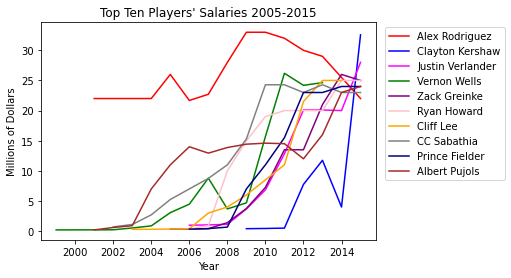

<Figure size 432x288 with 0 Axes>

In [20]:
x_axis = rodrial01.loc[:,"yearID"]
x_axis2 = kershcl01.loc[:,"yearID"]
x_axis3 = verlaju01.loc[:,"yearID"]
x_axis4 = wellsve01.loc[:,"yearID"]
x_axis5 = greinza01.loc[:,"yearID"]
x_axis6 = howarry01.loc[:,"yearID"]
x_axis7 = leecl02.loc[:,"yearID"]
x_axis8 = sabatcc01.loc[:,"yearID"]
x_axis9 = fieldpr01.loc[:,"yearID"]
x_axis10 = pujolal01.loc[:,"yearID"]

rodrial01_sal = rodrial01.loc[:,"Salary in Millions"]
kershcl01_sal = kershcl01.loc[:,"Salary in Millions"]
verlaju01_sal = verlaju01.loc[:,"Salary in Millions"]
wellsve01_sal = wellsve01.loc[:,"Salary in Millions"]
greinza01_sal = greinza01.loc[:,"Salary in Millions"]  
howarry01_sal = howarry01.loc[:,"Salary in Millions"] 
leecl02_sal = leecl02.loc[:,"Salary in Millions"]
sabatcc01_sal = sabatcc01.loc[:,"Salary in Millions"]
fieldpr01_sal = fieldpr01.loc[:,"Salary in Millions"]  
pujolal01_sal = pujolal01.loc[:,"Salary in Millions"]
    
rod, = plt.plot(x_axis, rodrial01_sal, color="red", label="Alex Rodriguez")
ker, = plt.plot(x_axis2, kershcl01_sal, color="blue", label="Clayton Kershaw")
ver, = plt.plot(x_axis3, verlaju01_sal, color="magenta", label="Justin Verlander")
wel, = plt.plot(x_axis4, wellsve01_sal, color="green", label="Vernon Wells")
gre, = plt.plot(x_axis5, greinza01_sal, color="purple", label="Zack Greinke")
how, = plt.plot(x_axis6, howarry01_sal, color="pink", label="Ryan Howard")
lee, = plt.plot(x_axis7, leecl02_sal, color="orange", label="Cliff Lee")
sab, = plt.plot(x_axis8, sabatcc01_sal, color="gray", label="CC Sabathia")
fie, = plt.plot(x_axis9, fieldpr01_sal, color="navy", label="Prince Fielder")
puj, = plt.plot(x_axis10, pujolal01_sal, color="brown", label="Albert Pujols")

plt.title("Top Ten Players' Salaries 2005-2015")
plt.xlabel("Year")
plt.ylabel("Millions of Dollars")
plt.legend(handles=[rod, ker, ver, wel, gre, how, lee, sab, fie, puj], bbox_to_anchor=(1.4, 1.0), loc='upper right') #loc="best")

plt.show()
plt.savefig("Top Players Salaries")

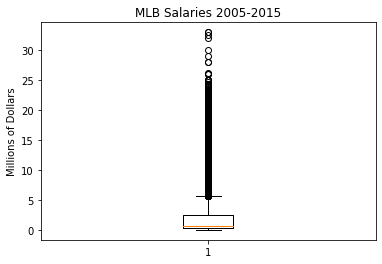

In [21]:
salaries = reduced_df["Salary in Millions"]
fig1, ax1 = plt.subplots()
ax1.set_title('MLB Salaries 2005-2015')
ax1.set_ylabel('Millions of Dollars')
ax1.boxplot(salaries)
plt.show()

In [22]:
#Individual years graphed: Not sure if needed
salaries_2005_df = reduced_df.loc[salaries_yr_df["yearID"]==2005]
salaries_2005_df

salaries_2005 = salaries_2005_df["Salary in Millions"]

salaries_2006_df = reduced_df.loc[salaries_yr_df["yearID"]==2006]
salaries_2006 = salaries_2006_df["Salary in Millions"]
salaries_2007_df = reduced_df.loc[salaries_yr_df["yearID"]==2007]
salaries_2007 = salaries_2007_df["Salary in Millions"]
salaries_2008_df = reduced_df.loc[salaries_yr_df["yearID"]==2008]
salaries_2008 = salaries_2008_df["Salary in Millions"]
salaries_2009_df = reduced_df.loc[salaries_yr_df["yearID"]==2009]
salaries_2009 = salaries_2009_df["Salary in Millions"]
salaries_2010_df = reduced_df.loc[salaries_yr_df["yearID"]==2010]
salaries_2010 = salaries_2010_df["Salary in Millions"]
salaries_2011_df = reduced_df.loc[salaries_yr_df["yearID"]==2011]
salaries_2011 = salaries_2011_df["Salary in Millions"]
salaries_2012_df = reduced_df.loc[salaries_yr_df["yearID"]==2012]
salaries_2012 = salaries_2012_df["Salary in Millions"]
salaries_2013_df = reduced_df.loc[salaries_yr_df["yearID"]==2013]
salaries_2013 = salaries_2013_df["Salary in Millions"]
salaries_2014_df = reduced_df.loc[salaries_yr_df["yearID"]==2014]
salaries_2014 = salaries_2014_df["Salary in Millions"]
salaries_2015_df = reduced_df.loc[salaries_yr_df["yearID"]==2015]
salaries_2015 = salaries_2015_df["Salary in Millions"]

# fig1, ax1 = plt.subplots()
# ax1.set_title('MLB Salaries 2005')
# ax1.set_ylabel('Millions of Dollars')
# ax1.boxplot(salaries_2005)
# plt.show()

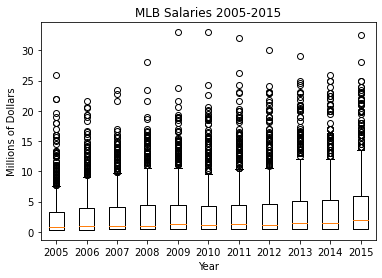

In [23]:
ten_year_salary_plot_data = [salaries_2005, salaries_2006, salaries_2007, salaries_2008, salaries_2009, salaries_2010, salaries_2011,
                            salaries_2012, salaries_2013, salaries_2014, salaries_2015]
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

fig1, ax1 = plt.subplots()
ax1.set_title("MLB Salaries 2005-2015")
ax1.set_xlabel("Year")
ax1.set_ylabel("Millions of Dollars")
ax1.boxplot(ten_year_salary_plot_data, labels = years)
plt.savefig("boxplot")
plt.show()
